In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('poster')
import statsmodels
from scipy import stats
from matplotlib import pyplot as plt
%matplotlib inline

# one sample comparison against baseline

1. make a null distribution that centers at the baseline value:
$${X} - \bar{X} + baseline$$
2. resample from the null distribution
3. compare the samples to the original data distribution
4. p value is the proportion of samples that exceed the data distribution
5. shown as the function below

In [4]:
def resample_ttest(x,baseline = 0.5,n_ps = 100,n_permutation = 5000,one_tail = False):
    """
    http://www.stat.ucla.edu/~rgould/110as02/bshypothesis.pdf
    """
    import numpy as np
    experiment = np.mean(x) # the mean of the observations in the experiment
    experiment_diff = x - np.mean(x) + baseline # shift the mean to the baseline but keep the distribution
    # newexperiment = np.mean(experiment_diff) # just look at the new mean and make sure it is at the baseline
    # simulate/bootstrap null hypothesis distribution
    # 1st-D := number of sample same as the experiment
    # 2nd-D := within one permutation resamping, we perform resampling same as the experimental samples,
    # but also repeat this one sampling n_permutation times
    # 3rd-D := repeat 2nd-D n_ps times to obtain a distribution of p values later
    temp = np.random.choice(experiment_diff,size=(x.shape[0],n_permutation,n_ps),replace=True)
    temp = temp.mean(0)# take the mean over the sames because we only care about the mean of the null distribution
    # along each row of the matrix (n_row = n_permutation), we count instances that are greater than the observed mean of the experiment
    # compute the proportion, and we get our p values
    
    if one_tail: # if it is directional comparison
        ps = (np.sum(temp >= experiment,axis=0)+1.) / (n_permutation + 1.)
    else: # if all we want is the difference
        ps = (np.sum(np.abs(temp) >= np.abs(experiment),axis=0)+1.) / (n_permutation + 1.)
    return ps

# Let's make up some data and compare parametric and nonparametric

one sample t test t = 2.6825,p = 0.0136
p = 0.0025 +/- 0.0005


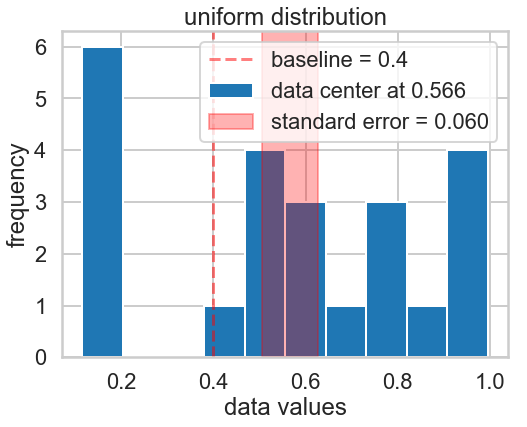

In [39]:
size = 23
data = np.random.uniform(low=0.,high=1.,size=size)
fig,ax = plt.subplots(figsize=(8,6))
ax.hist(data,label='data center at {:.3f}'.format(data.mean()))
baseline = 0.4
ax.axvline(baseline,color='red',linestyle='--',alpha=0.5,
          label='baseline = {}'.format(baseline))
ax.axvspan(
           data.mean()+data.std()/np.sqrt(size),
           data.mean()-data.std()/np.sqrt(size),
           color='red',
           alpha=0.3,
           label='standard error = {:.3f}'.format(data.std()/np.sqrt(size)))
t,pval = stats.ttest_1samp(data,popmean=baseline,)
print('one sample t test t = {:.4f},p = {:.4f}'.format(t,pval))
ps = resample_ttest(data,baseline=baseline,
                    n_ps=100,
                    n_permutation=int(1e4))
print('p = {:.4f} +/- {:.4f}'.format(ps.mean(),ps.std()))
ax.legend(loc='best')
_=ax.set(xlabel='data values',
       ylabel='frequency',
       title='uniform distribution')

one sample t test t = 1.0649,p = 0.2985
p = 0.1395 +/- 0.0036


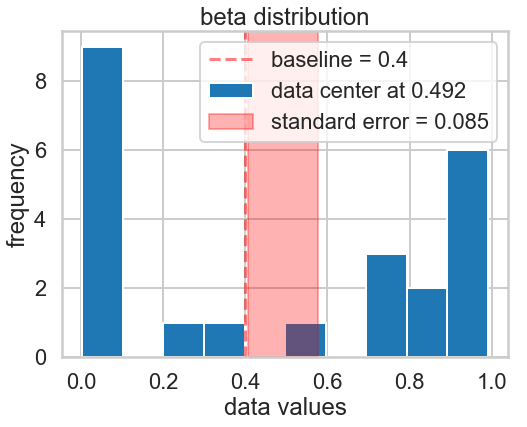

In [48]:
size = 23
data = np.random.beta(a=0.5,b=0.5,size=size)
fig,ax = plt.subplots(figsize=(8,6))
ax.hist(data,label='data center at {:.3f}'.format(data.mean()))
baseline = 0.4
ax.axvline(baseline,color='red',linestyle='--',alpha=0.5,
          label='baseline = {}'.format(baseline))
ax.axvspan(
           data.mean()+data.std()/np.sqrt(size),
           data.mean()-data.std()/np.sqrt(size),
           color='red',
           alpha=0.3,
           label='standard error = {:.3f}'.format(data.std()/np.sqrt(size)))
t,pval = stats.ttest_1samp(data,popmean=baseline,)
print('one sample t test t = {:.4f},p = {:.4f}'.format(t,pval))
ps = resample_ttest(data,baseline=baseline,
                    n_ps=100,
                    n_permutation=int(1e4))
print('p = {:.4f} +/- {:.4f}'.format(ps.mean(),ps.std()))
ax.legend(loc='best')
_=ax.set(xlabel='data values',
       ylabel='frequency',
       title='beta distribution')

one sample t test t = -2.8163,p = 0.0101
p = 0.6790 +/- 0.0051


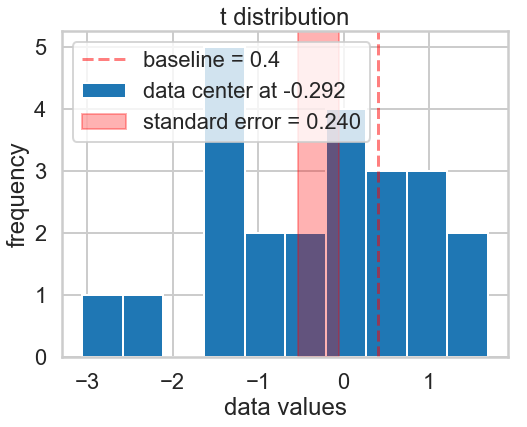

In [51]:
size = 23
data = np.random.standard_t(df=size-1,size=size)
fig,ax = plt.subplots(figsize=(8,6))
ax.hist(data,label='data center at {:.3f}'.format(data.mean()))
baseline = 0.4
ax.axvline(baseline,color='red',linestyle='--',alpha=0.5,
          label='baseline = {}'.format(baseline))
ax.axvspan(
           data.mean()+data.std()/np.sqrt(size),
           data.mean()-data.std()/np.sqrt(size),
           color='red',
           alpha=0.3,
           label='standard error = {:.3f}'.format(data.std()/np.sqrt(size)))
t,pval = stats.ttest_1samp(data,popmean=baseline,)
print('one sample t test t = {:.4f},p = {:.4f}'.format(t,pval))
ps = resample_ttest(data,baseline=baseline,
                    n_ps=100,
                    n_permutation=int(1e4))
print('p = {:.4f} +/- {:.4f}'.format(ps.mean(),ps.std()))
ax.legend(loc='best')
_=ax.set(xlabel='data values',
       ylabel='frequency',
       title='t distribution')

one sample t test t = 1.4957,p = 0.1489
p = 0.0649 +/- 0.0024


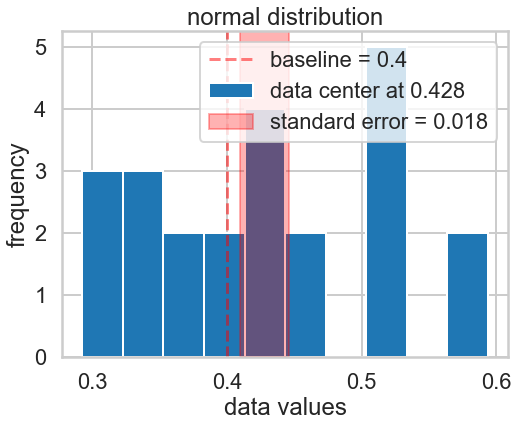

In [54]:
size = 23
data = np.random.normal(loc=0.43,scale=0.11,size=size)
fig,ax = plt.subplots(figsize=(8,6))
ax.hist(data,label='data center at {:.3f}'.format(data.mean()))
baseline = 0.4
ax.axvline(baseline,color='red',linestyle='--',alpha=0.5,
          label='baseline = {}'.format(baseline))
ax.axvspan(
           data.mean()+data.std()/np.sqrt(size),
           data.mean()-data.std()/np.sqrt(size),
           color='red',
           alpha=0.3,
           label='standard error = {:.3f}'.format(data.std()/np.sqrt(size)))
t,pval = stats.ttest_1samp(data,popmean=baseline,)
print('one sample t test t = {:.4f},p = {:.4f}'.format(t,pval))
ps = resample_ttest(data,baseline=baseline,
                    n_ps=100,
                    n_permutation=int(1e4))
print('p = {:.4f} +/- {:.4f}'.format(ps.mean(),ps.std()))
ax.legend(loc='best')
_=ax.set(xlabel='data values',
       ylabel='frequency',
       title='normal distribution')

# Paired sample comparison

1. get the difference between the 2 samples
2. use one sample comparison against 0 as the baseline

# Independent sample comparison (unmatched sample size)

1. calculate the 